In [2]:
import numpy as np
import copy
import random
import networkx as nx
import matplotlib.pyplot as plt
import time

# 获取当前时间戳
current_time = int(time.time())

# 使用时间戳作为种子
np.random.seed(current_time)

category = [" District ", " Supermarket ", " Product ", " Ingredient "]

items_flatten = {' District ': [' Suburban Neighborhood ', ' Urban Residential Area ', ' Gated Community ', ' High-rise Apartment Complex ', ' Condo District ', ' Single-family Homes ', ' Housing Estate ', ' Dormitory District ', ' Senior Living Community ', ' Student Housing ', ' Shopping District ', ' Business District ', ' Financial District ', ' Industrial District ', ' Warehouse District ', ' Market District ', ' Restaurant District ', ' Entertainment District ', ' Arts District ', ' Fashion District ', ' Silicon Valley ', ' Wall Street ', ' Tech Park ', ' Automotive District ', ' Jewelry District ', ' Medical District ', ' Legal District ', ' Media District ', ' Research Park ', ' Manufacturing District ', ' Old Town ', ' Heritage District ', ' Colonial District ', ' Historic Downtown ', ' Archaeological District ', ' Preservation District ', ' Cultural Heritage Site ', ' Landmark District ', ' Ancient City ', ' Historic Neighborhood ', ' University Campus ', ' School District ', ' Research and Innovation Park ', ' Academic District ', ' College Town ', ' Education Park ', ' Learning Hub ', ' Institute District ', ' High School Zone ', ' Library District ', ' Capitol District ', ' Government Complex ', ' Civic Center ', ' Embassy Row ', ' Administrative District ', ' Diplomatic Quarter ', ' Military District ', ' Courthouse District ', ' Legislative District ', ' Municipal Office District '],
                 ' Supermarket ': [' Produce Section ', ' Dairy Section ', ' Meat and Poultry Section ', ' Seafood Section ', ' Frozen Foods ', ' Canned Goods ', ' Baking Aisle ', ' Snacks and Chips Aisle ', ' Condiments and Sauces ', ' Beverages Aisle ', ' Health Foods Aisle ', ' Organic Foods Section ', ' International Foods Aisle ', ' Pet Food Aisle ', ' Baby Products Aisle ', ' Household Items Aisle ', ' Cleaning Supplies Aisle ', ' Paper Goods Aisle ', ' Toiletries Aisle ', ' Pharmacy Aisle ', ' Express Checkout ', ' Self-Checkout ', ' Cashier Counter ', ' Customer Service Desk ', ' Return Counter ', ' Online Pickup Counter ', ' Bagging Area ', ' Loyalty Program Signup ', ' Gift Card Station ', ' Store Credit Application ', ' Grocery Pickup Zone ', ' Recycling Bin ', ' Bakery Section ', ' Deli Counter ', ' Cheese Section ', ' Floral Department ', ' Wine and Spirits Section ', ' Ethnic Foods Section ', ' Sushi Counter ', ' Salad Bar ', ' Rotisserie Section ', ' Prepared Foods ', ' Juice Bar ', ' Coffee Station ', ' Ice Cream Station ', ' Candy Counter ', ' Bulk Foods Section ', ' Olive Bar ', ' Butcher Counter ', ' Seafood Counter ', ' Pet Care Section ', ' Pharmacy ', ' Online Shopping ', ' Delivery Service ', ' In-store Pickup ', ' Cooking Classes ', ' Nutrition Consulting ', ' Catering Service ', ' Event Planning ', ' Floral Arrangements ', ' Gift Baskets ', ' Loyalty Programs ', ' Price Matching ', ' Product Recalls ', ' Refunds and Exchanges ', ' Lost and Found ', ' Customer Feedback ', ' Shopping Carts ', ' Baskets ', ' Store Directory ', ' Restrooms ', ' Hand Sanitizing Stations ', ' Security Desk ', ' Store Announcements ', ' In-store Music ', ' Promotional Displays ', ' Sales Flyers ', ' Bulletin Board ', ' Community Events ', ' Lost Children Desk ', ' Store Signage ', ' Exit '],
                 ' Product ': [' Canned Vegetables ', ' Canned Fruits ', ' Canned Soups ', ' Canned Beans ', ' Canned Meat ', ' Canned Fish ', ' Canned Tomatoes ', ' Canned Corn ', ' Canned Peas ', ' Canned Chili ', ' Canned Pasta ', ' Canned Sauces ', ' Canned Broth ', ' Canned Coconut Milk ', ' Canned Pumpkin ', ' Canned Mushrooms ', ' Canned Spinach ', ' Canned Artichokes ', ' Canned Pineapple ', ' Canned Peaches ', ' Potato Chips ', ' Pretzels ', ' Popcorn ', ' Candy Bars ', ' Gummy Candy ', ' Cookies ', ' Crackers ', ' Granola Bars ', ' Fruit Snacks ', ' Cheese Puffs ', ' Nuts ', ' Trail Mix', ' Beef Jerky ', ' Rice Cakes ', ' Yogurt Covered Raisins ', ' Chocolate Covered Pretzels ', ' Tortilla Chips ', ' Salsa ', ' Hummus ', ' Dried Fruit ', ' Soda ', ' Juice ', ' Bottled Water ', ' Sports Drinks ', ' Energy Drinks ', ' Tea ', ' Coffee ', ' Milk ', ' Plant-based Milk ', ' Sparkling Water ', ' Alcoholic Beverages ', ' Wine ', ' Beer ', ' Liquor ', ' Cocktail Mixers ', ' Smoothies ', ' Protein Shakes ', ' Flavored Water ', ' Herbal Tea ', ' Iced Tea ', ' Lemonade ', ' Bread ', ' Bagels ', ' Muffins ', ' Croissants ', ' Cookies ', ' Brownies ', ' Cakes ', ' Pies ', ' Pastries ', ' Doughnuts ', ' Biscuits ', ' Rolls ', ' Buns ', ' Flatbreads ', ' Tortillas ', ' Pizza Dough ', ' Scones ', ' Danish Pastries ', ' Cupcakes ', ' Cheesecake ', ' Milk ', ' Cheese ', ' Yogurt ', ' Butter ', ' Cream ', ' Ice Cream ', ' Sour Cream ', ' Cottage Cheese ', ' Cream Cheese ', ' Whipped Cream ', ' Buttermilk ', ' Greek Yogurt ', ' Kefir ', ' Custard ', ' Pudding ', ' Evaporated Milk ', ' Condensed Milk ', ' Plant-based Yogurt ', ' Plant-based Cheese ', ' Half-and-half '],
                 ' Ingredient ': [' Salt ', ' Pepper ', ' Paprika ', ' Cinnamon ', ' Cumin ', ' Turmeric ', ' Oregano ', ' Basil ', ' Rosemary ', ' Thyme ', ' Garlic Powder ', ' Onion Powder ', ' Chili Powder ', ' Ginger ', ' Nutmeg ', ' Cloves ', ' Bay Leaves ', ' Dill ', ' Parsley ', ' Coriander ', ' Fennel Seeds ', ' Mustard Seeds ', ' Cardamom ', ' Star Anise ', ' Saffron ', ' Vanilla Extract ', ' Mint ', ' Sage ', ' Ketchup ', ' Mustard ', ' Mayonnaise ', ' Soy Sauce ', ' Hot Sauce ', ' Barbecue Sauce ', ' Vinegar ', ' Olive Oil ', ' Salad Dressing ', ' Worcestershire Sauce ', ' Tahini ', ' Honey ', ' Maple Syrup ', ' Jam ', ' Jelly ', ' Peanut Butter ', ' Nutella ', ' Relish ', ' Pickles ', ' Chutney ', ' Hoisin Sauce ', ' Oyster Sauce ', ' Fish Sauce ', ' Sriracha ', ' Rice ', ' Pasta ', ' Quinoa ', ' Barley ', ' Oats ', ' Cornmeal ', ' Bulgur ', ' Couscous ', ' Farro ', ' Buckwheat ', ' Millet ', ' Wheat Germ ', ' Cereal ', ' Granola ', ' Muesli ', ' Grits ', ' Polenta ', ' Amaranth ', ' Sorghum ', ' Spelt ', ' Flour ', ' Sugar ', ' Baking Soda ', ' Baking Powder ', ' Yeast ', ' Cocoa Powder ', ' Cornstarch ', ' Gelatin ', ' Vanilla Extract ', ' Almond Extract ', ' Chocolate Chips ', ' Nuts ', ' Dried Fruit ', ' Coconut ', ' Food Coloring ', ' Sprinkles ', ' Condensed Milk ', ' Evaporated Milk ', ' Sweetened Condensed Milk ', ' Molasses ', ' Olive Oil ', ' Vegetable Oil ', ' Coconut Oil ', ' Butter ', ' Margarine ', ' Lard ', ' Shortening ', ' Ghee ', ' Sunflower Oil ', ' Peanut Oil ', ' Sesame Oil ', ' Avocado Oil ', ' Canola Oil ', ' Corn Oil ', ' Palm Oil ', ' Flaxseed Oil ']}

## Generate Structure Graph

In [4]:
class Vertex:
    def __init__(self, name, layer):
        self.value = 0
        self.item_name = name
        self.layer = layer

def drawStructure(e, d, w0, w1):
    """
        d: number of layers (2, 3, 4)
        e: number of edges
        w: number of node per layer
    """
    l = np.full(d, w0)
    p = np.random.uniform(0,1)
    while not np.array_equal(l, np.full(d, w1)):
        e_minus = np.sum(l) - l[0]  # Minimum number of edges
        e_plus = sum(l[i] * l[i + 1] for i in range(len(l) - 1))  # Maximum number of edges

        if e_plus < e:
            i = np.random.choice([i for i in range(d) if l[i] < w1])
            l[i] += 1
        elif e_minus == e:
            break
        elif np.random.uniform(0,1) < p:
            i = np.random.choice([i for i in range(d) if l[i] < w1])
            l[i] += 1
        else:
            break
    
    # Construct the graph structure G_s with exactly l_i items on layer i
    Layers = dict[int, list[str]]() # {int(layer_i: listitem_names}

    adj_list = dict[Vertex, list[Vertex]]()
    num_edge = 0

    for i in range(d):
        names = np.random.choice(items_flatten[category[i]], l[i], replace=False)
        Layers[i] = [Vertex(name, i) for name in names]
    
        
    for i in range(d-1):
        for v in Layers[i]:
            index_b = np.random.choice(range(l[i+1]))
            b = Layers[i+1][index_b]
            adj_list[v] = [b]
            num_edge += 1

    
    # Adding more edges if the number of edges is less than e
    while num_edge < e:
        # Randomly select two layers to connect
        layer_a = np.random.choice(range(d - 1))
        layer_b = layer_a + 1
        
        # Randomly select vertices from adjacent layers
        a = np.random.choice(Layers[layer_a])
        b = np.random.choice(Layers[layer_b])
        
        # Add an edge if it doesn't exist
        if b not in adj_list[a]:
            adj_list[a].append(b)
            num_edge += 1
    
    # Return the structure
    return adj_list, Layers

visualize layered structure graph

In [5]:
def visualize_structure_graph(graph, layers, title="Structure Graph"):
    G = nx.DiGraph()
    
    # Add nodes to the graph
    for layer, nodes in layers.items():
        for node in nodes:
            G.add_node(node.item_name, layer=layer)
    
    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node.item_name, neighbor.item_name)
    
    # Set up the plot
    plt.figure(figsize=(15, 10))
    plt.title(title)
    
    # Use a hierarchical layout
    pos = nx.multipartite_layout(G, subset_key="layer")
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=8, font_weight='bold', 
            arrows=True, edge_color='gray')
    
    # Add labels to nodes
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

3 12


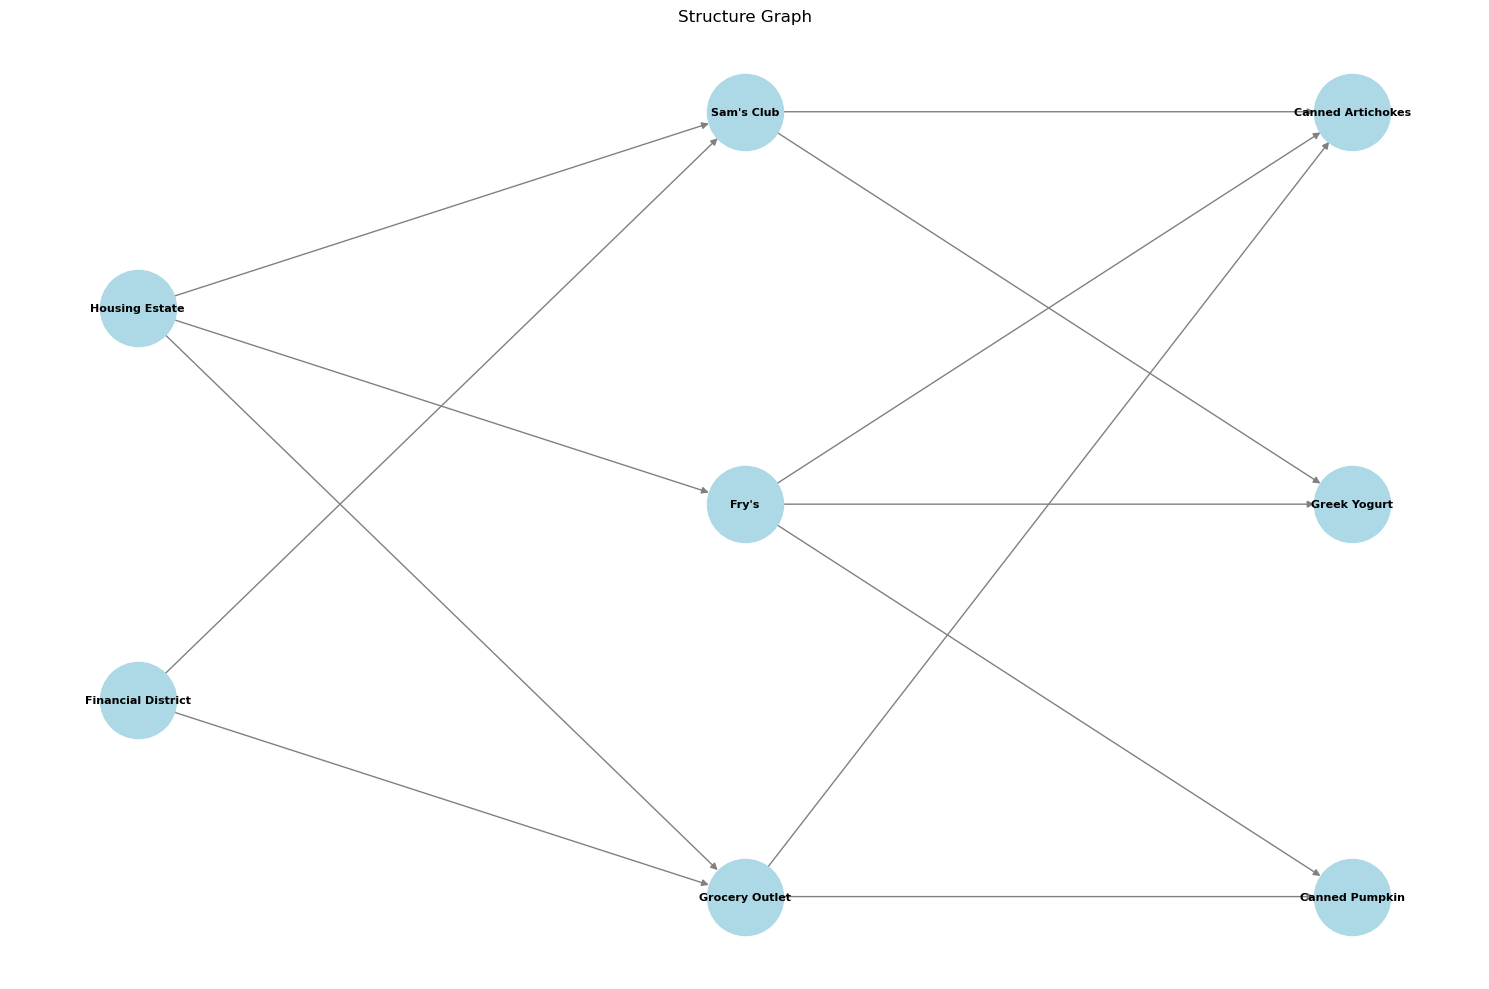

In [86]:
w0 = 2
w1 = 4
assert(w0>=2 and w1>=w0 and w1<=4)

d = np.random.randint(2, 5)
#d = 4
e = np.random.randint((d-1)*w0, (d-1)*w1**2+1)
print(d, e)

adj_list, Layers = drawStructure(e, d, w0, w1)

visualize_structure_graph(adj_list, Layers)


## Dependency Graph

In [87]:
def add_graphs(graph1, graph2):
    # 创建一个新字典来存储合并后的图
    if graph1 is None:
        return graph2
    if graph2 is None:
        return graph1
    combined_graph = {}

    # 合并第一个图的所有节点及其邻居
    for node, neighbors in graph1.items():
        if node not in combined_graph:
            combined_graph[node] = []
        combined_graph[node].extend(neighbors)

    # 合并第二个图的所有节点及其邻居
    for node, neighbors in graph2.items():
        if node not in combined_graph:
            combined_graph[node] = []
        combined_graph[node].extend(neighbors)

    # 去重处理：确保每个节点的邻居列表中没有重复项
    for node in combined_graph:
        combined_graph[node] = list(set(combined_graph[node]))

    return combined_graph

def operation(G):
    num = 0
    for node, dependency in G.items():
        num += max(len(dependency)-1, 1)
    return num

In [48]:
def find_depend(abs_para, adj_list, G):
    index2 = category.index(abs_para[1])
    index1 = abs_para[0].layer
    #print(index1, index2)
    if (index2-1)==index1:
        G[abs_para] = []
        for item in adj_list[abs_para[0]]:
            instance_para = (abs_para[0], item)
            G[instance_para] = []
            G[abs_para].append(instance_para)
    else:
        G[abs_para] = []
        for item in adj_list[abs_para[0]]:
            instance_para = (abs_para[0], item)
            G[instance_para] = []
            G[abs_para].append(instance_para)
            abs_para_middle = (item, abs_para[1])
            G[abs_para].append(abs_para_middle)
            find_depend(abs_para_middle, adj_list, G)
    return G

In [49]:
def drawNecessary1(Layers, adj_list, n, m):
    Gnece1 = dict[tuple, list]()
    updated = True
    d = len(Layers)
    abs_candidates = dict[int, list[tuple]]()
    while updated: 
        updated = False
        for i in range(d - 1, 0, -1):
            if i in abs_candidates:
                candidates = abs_candidates[i]
            else:
                abs_candidates[i] = []
                for j in range(d-i):
                    for item in Layers[j]:
                        abs_candidates[i].append((item, category[i+j]))
                candidates = abs_candidates[i]
                
            candidates = [param for param in candidates if param not in Gnece1]
            if candidates:
                index = np.random.choice(len(candidates))
                selected_param = candidates[index]
                #print('try')
                G = dict()
                G1 = find_depend(selected_param, adj_list, G)
                #print(len(G1))

                G_prime = add_graphs(Gnece1, G1)

                if operation(G_prime) <= n:
                    Gnece1 = G_prime
                    updated = True
                    break

    Gnece2 = Gnece1

     # Add more instance parameters to Gnece2_d
    all_instance_para = [] 
    for key, value in adj_list.items():
        for v in value:
            all_instance_para.append((key, v))
    
    left_instance_para = [para for para in all_instance_para if para not in Gnece1]
    # Calculate how many more instance parameters we need to add
    num_to_add = m - operation(Gnece2)

    # Randomly choose num_to_add instance parameters (or all remaining if there are fewer)
    num_to_add = min(num_to_add, len(left_instance_para))
    selected_indices = np.random.choice(len(left_instance_para), num_to_add, replace=False)

    for index in selected_indices:
        selected_instance_para = left_instance_para[index]
        Gnece2[selected_instance_para] = []
    
    return Gnece2

In [82]:
def nodetoname(node, sentence=False):
        if node=="RNG":
            return node
        if isinstance(node[1], str):
            if sentence:
                return "each "+node[0].item_name+"'s "+node[1]
            else:
                return node[0].item_name+"'s "+node[1]
        else:
            if sentence:
                return "each "+node[0].item_name+"'s "+node[1].item_name
            else:
                return node[0].item_name + "'s " + node[1].item_name

In [51]:
def visualize_dependency_graph(graph, title="Dependency Graph"):
    G = nx.DiGraph()

    # Add all nodes to the graph, including isolated ones
    for node in graph.keys():
        G.add_node(nodetoname(node))
    
    # Add edges to the graph and store edge colors
    edge_colors = []
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(nodetoname(node), nodetoname(neighbor))
            # Add your condition here to determine if the edge should be red
            if isinstance(node[1], str):
                edge_colors.append('red')
            else:
                edge_colors.append('gray')
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    # Use a spring layout
    pos = nx.spring_layout(G, k=0.9, iterations=50)
    
    # Draw the graph with colored edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=2000, font_size=8, font_weight='bold', 
            arrows=True, edge_color=edge_colors)
    
    # Add labels to nodes
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [153]:
n = 3
m = 5

Gnece2_d = drawNecessary1(Layers, adj_list, n, m)

In [154]:
def print_g(graph):
    for node, neighbors in graph.items():
        print(nodetoname(node) +  ":")
        for neighbor in neighbors:
            print(nodetoname(neighbor))
        print('----')

print_g(Gnece2_d)

Fry's's Greek Yogurt:
----
Housing Estate's Fry's:
----
Housing Estate's Grocery Outlet:
----
Financial District's Grocery Outlet:
----
Sam's Club's Greek Yogurt:
----


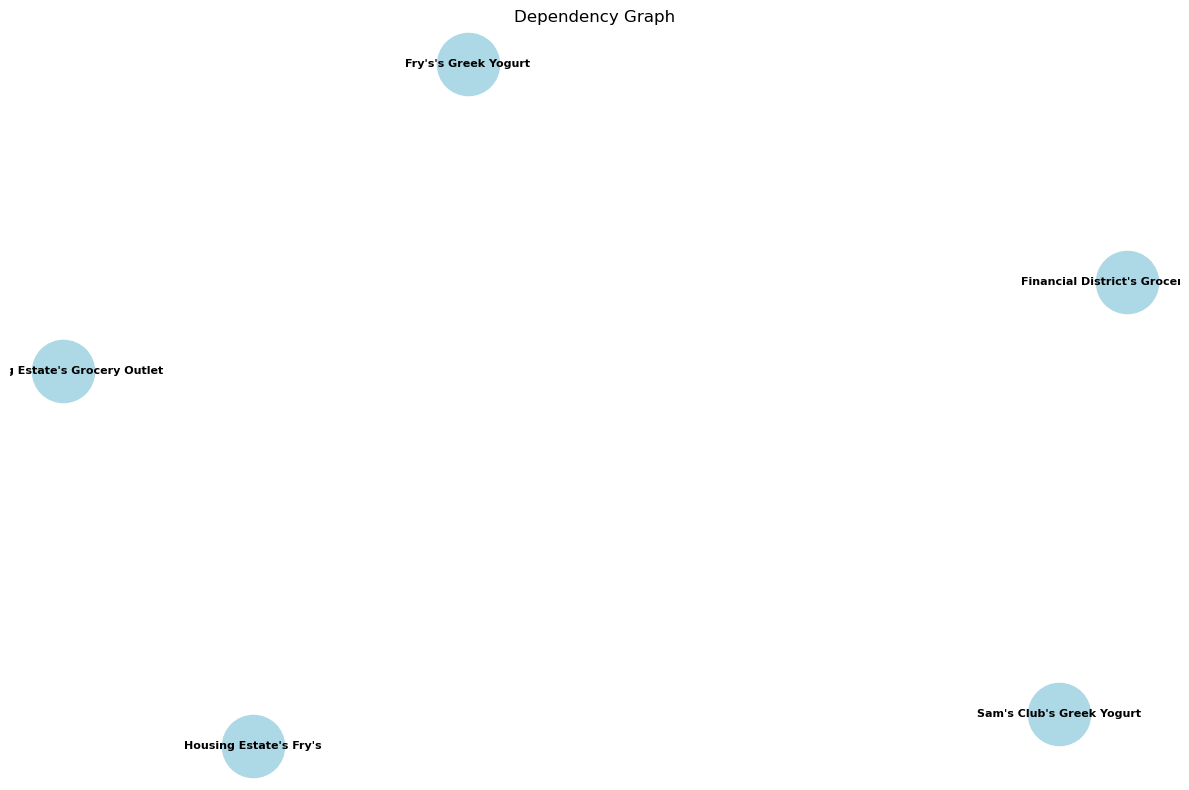

In [155]:
visualize_dependency_graph(Gnece2_d)

In [55]:
def draw_necessary2(Gnece2_d):
    """
    Constructs Gnece3_d and a random topological ordering Topo as per D.2.2.
    """
    Gnece3_d = Gnece2_d
    Topo = []

    def next1(Topo, G_topo):
        # necessary torwards the computation of query
        return [a for a in G_topo if any(a in Gnece3_d[b] for b in Topo)]

    def next2(Topo, G_topo):
        # if not, some other parameter depends on it and is not yet added to Topo
        #dependent_params = set(b for a in G_topo for b in Gnece3_d[a])
        #return list(set(G_topo) - dependent_params)
        return [a for a in G_topo if not any(a in Gnece3_d[b] for b in G_topo if b != a)]
        #return [a for a in G_topo if not any(a in Gnece3_d[b] for b in G_topo if b != a)]

    def biased_random_selection(param_set):
        if not param_set:
            return None
        
        # Convert param_set to a list if it's not already
        param_set = param_set
        
        # Generate a random Gaussian value
        g = np.random.normal(0, 1)

        def weight(a):
            # Define weight function as per the remark
            return (isinstance(a[1], str) + (a in next1(Topo, G_topo))) * abs(g)
        
        # Calculate the weights for each parameter in the set
        weights = [weight(a) for a in param_set]

        # Convert weights to probabilities
        probabilities = np.exp(weights)
        probabilities /= probabilities.sum()

        # Sample a parameter according to the calculated probabilities
        index = np.random.choice(len(param_set), p=probabilities)
        selected_param = param_set[index]
        
        return selected_param


    while True:
        G_topo = [a for a in Gnece3_d if a not in Topo]
        if not Topo:
            param0 = random.choice(next2(Topo, G_topo))
            #print(next2(Topo, G_topo))
        else:
            possible = list(set(next1(Topo, G_topo)).intersection(set(next2(Topo, G_topo)))) # intersection: rid some of intermediate abstract para
            param0 = random.choice(possible)
        
        Topo.insert(0, param0)
        # for para in Topo:
        #     print(nodetoname(para))
        # print('end')
        G_topo = [a for a in Gnece3_d if a not in Topo]
        if not G_topo:
            break
        if not list(set(next1(Topo, G_topo)).intersection(set(next2(Topo, G_topo)))):
            if isinstance(param0[1], str):
                return (None, None)
            param1 = biased_random_selection(next2(Topo, G_topo))
            if param1 is not None:
                Gnece3_d[param0].append(param1)
        elif not isinstance(param0[1], str):
            # Probability event p0
            p0 = np.random.uniform(0, 1)
            p1 = np.random.uniform(0, 1)
            if p1 < p0:
                param1 = biased_random_selection(G_topo)
                if param1 is not None:
                    Gnece3_d[param0].append(param1)

    return Gnece3_d, Topo


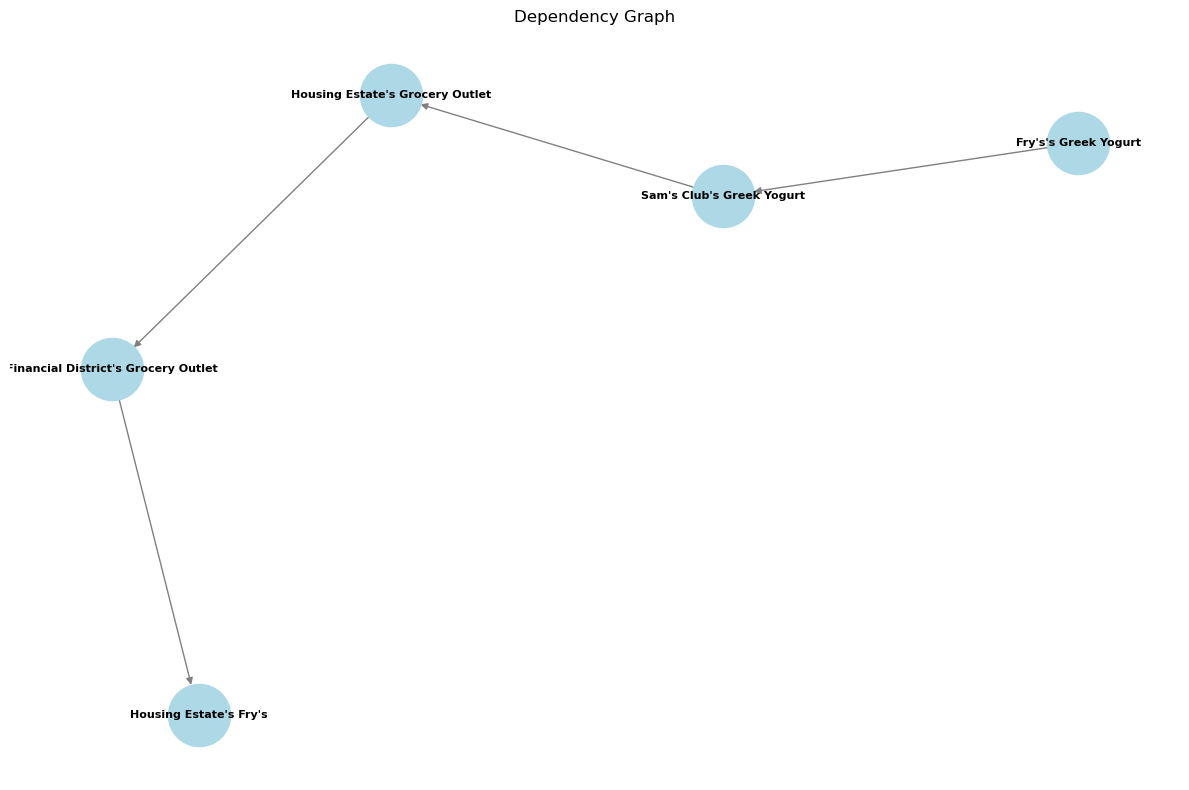

In [156]:
Gnece3_d, Topo = draw_necessary2(Gnece2_d)
if Gnece3_d:
    visualize_dependency_graph(Gnece3_d)
else:
    print("failure")


In [157]:
for para in Topo:
    print(nodetoname(para))

Housing Estate's Fry's
Financial District's Grocery Outlet
Housing Estate's Grocery Outlet
Sam's Club's Greek Yogurt
Fry's's Greek Yogurt


In [158]:
def draw_necessary3(Gnece3_d, Topo, s):
    cur_op = dict[tuple, int]()
    for a in Gnece3_d:
        cur_op[a] = max(1, len(Gnece3_d[a])-1)

    def max_op(a, Topo):
        return min(3, max(1, Topo.index(a)))
    
    while sum(cur_op.values()) < s:
        eligible = []
        for a in Gnece3_d:
            if (not isinstance(a[1], str)) and cur_op[a] < max_op(a, Topo):
                eligible.append(a)
        if not eligible:
            return None
        a = random.choice(eligible)
        cur_op[a] += 1
    
    Gnece3_d["RNG"] = []
    for a in Gnece3_d:
        if (not a=="RNG") and (not isinstance(a[1], str)):
            pool = ["RNG"] + Topo[:Topo.index(a)]
            if cur_op[a] == 1:
                dep_num = random.choice([1, 2])
            else:
                dep_num = cur_op[a] + 1
            dep_num = min(dep_num, len(pool))
            re = [b for b in Gnece3_d[a] if b in pool]
            if re:
                b = re[0]
                pool.remove(b)
                dep_num -= 1
            if dep_num == len(pool):
                Gnece3_d[a].extend(pool)
            else:
                if np.random.uniform(0,1)>0.5:
                    Gnece3_d[a].append("RNG")
                    dep_num -= 1
                pool.remove("RNG")
                if dep_num > 0:
                    indexs = np.random.choice(len(pool), dep_num, replace=False)
                    for index in indexs:
                        Gnece3_d[a].append(pool[index])

    return Gnece3_d

In [159]:
s = 8
Gnece_d = draw_necessary3(Gnece3_d, Topo, s)


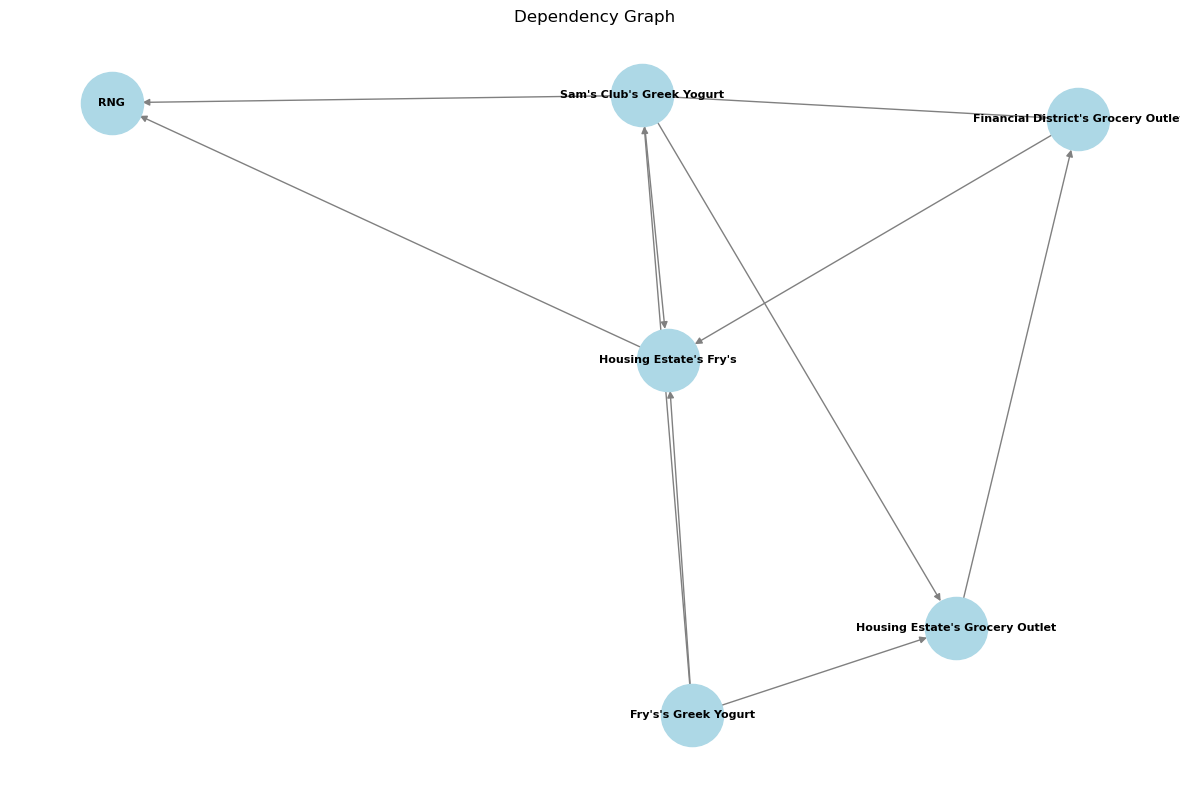

In [160]:
if Gnece_d:
    visualize_dependency_graph(Gnece_d)
else:
    print("failure")

In [113]:
import string

def generate_var(G_value):
    new_var = None
    while new_var is None or new_var in G_value.values():
        new_var = random.choice(string.ascii_letters)
    return new_var

In [166]:
def gen_description(G_d, a, G_var, G_value):
    # Initialize the sentence string
    str_sentence = f"The number of {nodetoname(a)} equals"

    # Determine the pool of dependencies
    pool = [val for val in G_d[a]]
    print(pool)

    var_a = G_var[a]
    solution = ["Define " + nodetoname(a, True) + " as " + var_a]

    num_step = ""

    # Check if RNG is in the pool
    if 'RNG' in pool:
        random_int = random.randint(0, 22)
        str_sentence += f" {random_int}"
        pool.remove('RNG')
        if len(pool) > 0:
            plus_times = " + " if random.random() < 0.5 else " * "
            num_step = "So " + var_a + " = " + str(random_int) + plus_times
            if plus_times == " + ":
                str_sentence += " more than"
            else:
                str_sentence += " times"
        else:
            solution.append("So "+var_a+" = " + str(random_int))
            G_value[var_a] = random_int
            print(random_int)


    # Depending on the size of the pool, add to the sentence
    if len(pool) == 1:
        b = nodetoname(pool[0])
        str_sentence += f" {b}"
        var_1 = G_var[pool[0]]
        if not num_step:
            solution.append("So " + var_a + " = " + var_1 + " = " + str(G_value[var_1]))
            G_value[var_a] = G_value[var_1]
        else:
            if plus_times == " + ":
                G_value[var_a] = G_value[var_1] + random_int
            else:
                G_value[var_a] = G_value[var_1] * random_int
            num_step += var_1 + " = " + str(random_int) + plus_times + str(G_value[var_1]) + " = " + str(G_value[var_a])
            solution.append(num_step)
    elif len(pool) == 2:
        b, c = nodetoname(pool[0]), nodetoname(pool[1])
        var_1 = G_var[pool[0]]
        var_2 = G_var[pool[1]]

        new_var = generate_var(G_value)

        sum_or_diff = " + " if random.random() < 0.5 else " - "
        if sum_or_diff == " + ":
            str_sentence += f" the sum of {b} and {c}"
            G_value[new_var] = G_value[var_1] + G_value[var_2]
        else:
            str_sentence += f" the difference of {b} and {c}"
            G_value[new_var] = G_value[var_1] - G_value[var_2]

        
        if not num_step:
            G_value[var_a] = G_value[new_var]
            solution.append("So " + var_a + " = " + var_1 + sum_or_diff + var_2 + " = " + str(G_value[var_1]) + sum_or_diff + str(G_value[var_2]) + " = " + str(G_value[var_a]))
        else:
            solution.append(new_var + " = " + var_1 + sum_or_diff + var_2 + " = " + str(G_value[var_1]) + sum_or_diff + str(G_value[var_2]) + " = " + str(G_value[new_var]))
            if plus_times == " + ":
                G_value[var_a] = G_value[new_var] + random_int
            else:
                G_value[var_a] = G_value[new_var] * random_int
            num_step += new_var + " = " + str(random_int) + plus_times + str(G_value[new_var]) + " = " + str(G_value[var_a])
            solution.append(num_step)
    else:
        if pool:
            pool_name_list = []
            pool_var_list = []
            for i in pool:
                pool_name_list.append(nodetoname(i))
                pool_var_list.append(G_var[i])
            while len(pool_var_list) > 2:
                new_var = generate_var(G_value)
                var_1 = pool_var_list[-1]
                var_2 = pool_var_list[-2]
                G_value[new_var] = G_value[var_1] + G_value[var_2]
                solution.append(new_var + " = " + var_1 + " + " + var_2 + " = " + str(G_value[var_1]) + " + " + str(G_value[var_2]) + " = " + str(G_value[new_var]))
                pool_var_list.pop(-1)
                pool_var_list.pop(-1)
                pool_var_list.append(new_var)

            var_1 = pool_var_list[0]
            var_2 = pool_var_list[1]
            
            if not num_step:
                G_value[var_a] = G_value[var_1] + G_value[var_2]
                solution.append("So " + var_a + " = " + var_1 + " + " + var_2 + " = " + str(G_value[var_1]) + " + " + str(G_value[var_2]) + " = " + str(G_value[var_a]))
            else:
                new_var = generate_var(G_value)
                G_value[new_var] = G_value[var_1] + G_value[var_2]
                solution.append(new_var + " = " + var_1 + " + " + var_2 + " = " + str(G_value[var_1]) + " + " + str(G_value[var_2]) + " = " + str(G_value[new_var]))
                if plus_times == " + ":
                    G_value[var_a] = G_value[new_var] + random_int
                else:
                    G_value[var_a] = G_value[new_var] * random_int
                num_step += new_var + " = " + str(random_int) + plus_times + str(G_value[new_var]) + " = " + str(G_value[var_a])
                solution.append(num_step)

            random.shuffle(pool_name_list)
            str_sentence += " the sum of " + ", ".join(pool_name_list[:-1]) + f", and {pool_name_list[-1]}"

    return str_sentence, solution


In [167]:
def question_solution(Gnece_d, Topo, front=False):
    query = nodetoname(Topo[-1])
    a, b = query.split("'s ")
    q = "How many " + b + " does " + a + " have?"

    # Generate English descriptions
    question_descriptions = []
    solution_descriptions = []

    # Create a list of available letters
    available_letters = list(string.ascii_letters)
    random.shuffle(available_letters)

    # Create the G_var dictionary
    G_var = {}
    for key in Gnece_d.keys():
        if available_letters:
            G_var[key] = available_letters.pop()
        else:
            # If we run out of letters, start combining them
            G_var[key] = ''.join(random.sample(string.ascii_letters, 2))

    G_value = dict[str, int]()

    for a in Topo:
        if not isinstance(a[1], str):
            sentence1, sentence2 = gen_description(Gnece_d, a, G_var, G_value)
            question_descriptions.append(sentence1)
            solution_descriptions.append(sentence2)
        else:
            # order: instance, abstract, instance
            var_a = G_var[a]
            solution_abs = ["Define " + nodetoname(a, True) + " as " + var_a]

            new_var_list = []
            n = len(Gnece_d[a])
            assert(n%2==0)
            if n == 2:
                var_1 = G_var[Gnece_d[a][0]]
                var_2 = G_var[Gnece_d[a][1]]
                G_value[var_a] = G_value[var_1] * G_value[var_2]
                solution_abs.append(var_a + " = " + var_1 + " * " + var_2 + " = " + str(G_value[var_1]) + " * " + str(G_value[var_2]) + " = " + str(G_value[var_a]))
            elif n > 2:
                new_var_list = []
                for i in range(n//2):
                    var_1 = G_var[Gnece_d[a][2*i]]
                    var_2 = G_var[Gnece_d[a][2*i+1]]
                    new_var = generate_var(G_value)
                    G_value[new_var] = G_value[var_1] * G_value[var_2]
                    solution_abs.append(new_var + " = " + var_1 + " * " + var_2 + " = " + str(G_value[var_1]) + " * " + str(G_value[var_2]) + " = " + str(G_value[new_var]))
                    new_var_list.append(new_var)
                while len(new_var_list) > 2:
                    new_var = generate_var(G_value)
                    var_1 = new_var_list[-1]
                    var_2 = new_var_list[-2]
                    G_value[new_var] = G_value[var_1] + G_value[var_2]
                    solution.append(new_var + " = " + var_1 + " + " + var_2 + " = " + str(G_value[var_1]) + " + " + str(G_value[var_2]) + " = " + str(G_value[new_var]))
                    new_var_list.pop(-1)
                    new_var_list.pop(-1)
                    new_var_list.append(new_var)
                var_1 = G_var[new_var_list[0]]
                var_2 = G_var[new_var_list[1]]
                G_value[var_a] = G_value[var_1] + G_value[var_2]
                solution.append("So " + var_a + " = " + var_1 + " + " + var_2 + " = " + str(G_value[var_1]) + " + " + str(G_value[var_2]) + " = " + str(G_value[var_a]))
        print(G_var[a])
        print(G_value[G_var[a]])


        
    random.shuffle(question_descriptions)
    if not front:
        question =  ". ".join(question_descriptions) + ". " + q
    else:
        question = q + ". " + ". ".join(question_descriptions)

    solution = ""
    num_operation = 0
    for item in solution_descriptions:
        solution +=  "; ".join(item) + ".\n"
        num_operation += len(item) - 1
    return question, solution, num_operation

In [168]:
question, solution_descriptions, num_operation = question_solution(Gnece_d, Topo)

print(question)
print(solution_descriptions)
print(num_operation)


['RNG']
8
T
8
[(<__main__.Vertex object at 0x10f1a93a0>, <__main__.Vertex object at 0x10f39f350>)]
u
8
[(<__main__.Vertex object at 0x10f1aa7b0>, <__main__.Vertex object at 0x10f39cda0>)]
q
8
[(<__main__.Vertex object at 0x10f1a93a0>, <__main__.Vertex object at 0x10f39cda0>), 'RNG', (<__main__.Vertex object at 0x10f1a93a0>, <__main__.Vertex object at 0x10f39f350>), (<__main__.Vertex object at 0x10f1aa7b0>, <__main__.Vertex object at 0x10f39cda0>)]
s
24
[(<__main__.Vertex object at 0x10f39f110>, <__main__.Vertex object at 0x10f39ddf0>), (<__main__.Vertex object at 0x10f1a93a0>, <__main__.Vertex object at 0x10f39cda0>), (<__main__.Vertex object at 0x10f1a93a0>, <__main__.Vertex object at 0x10f39f350>)]
X
40
The number of Sam's Club's Greek Yogurt equals 1 times the sum of Housing Estate's Grocery Outlet, Housing Estate's Fry's, and Financial District's Grocery Outlet. The number of Housing Estate's Fry's equals 8. The number of Fry's's Greek Yogurt equals the sum of Sam's Club's Greek Yo

In [72]:
def draw_unnecessary(adj_list, Layers, G_d_nece):
    # Initialize the graph G_d and the IndList
    IndList = []

    all_instance_para = [] 
    for key, value in adj_list.items():
        for v in value:
            all_instance_para.append((key, v))
    
    left_instance_para = [para for para in all_instance_para if para not in G_d_nece]

    # Helper function to recursively add dependencies
    # def add_dependencies(b):
    #     if b not in G_d:
    #         G_d[b] = []
    #         for dep in G_d_nece.get(b, []):
    #             add_dependencies(dep)
    #             G_d[b].append(dep)

    def check_depend(abs_para):
        index2 = category.index(abs_para[1])
        index1 = abs_para[0].layer
        depend_list = []
        #print(index1, index2)
        for item in adj_list[abs_para[0]]:
            instance_para = (abs_para[0], item)
            if instance_para not in Gnece_d:
                return False
            else:
                depend_list.append(instance_para)
            if (index2-1)!=index1:
                abs_para_middle = (item, abs_para[1])
                if abs_para_middle not in Gnece_d:
                    return False
                else:
                    depend_list.append(abs_para_middle)
                    sub_depend_list = check_depend(abs_para_middle)
                if not sub_depend_list:
                    return False
                else:
                    depend_list.extend(sub_depend_list)
        return depend_list

    def abs_com_G():
        abs_computable = []
        # sample abs para
        d = len(Layers)
        for i in range(d - 1, 0, -1):
            for j in range(d-i):
                for item in Layers[j]:
                    abs_para = (item, category[i+j])
                    if abs_para not in G_d_nece and check_depend(abs_para):
                        abs_computable.append(abs_para)
        return abs_computable
                        
  

    # Main loop
    while any(param not in G_d_nece for param in all_instance_para):
        # Step 3: Combine all parameters in G_d and computable parameters
        K = set(G_d_nece.keys())
        K.update(abs_com_G())

        # Randomly select an instance parameter a from G_s that is not in G_d
        a = random.choice([param for param in all_instance_para if param not in G_d_nece])
        G_d_nece[a] = []  # Add a to G_d

        # Randomly decide the pool
        if random.random() < 0.5:
            pool = set(IndList + ['RNG'])
            IndList.append(a)
        else:
            pool = K.union(['RNG'])

        # Initialize dep_num
        dep_num = 1

        # While loop for dependency count
        while dep_num < min(4, len(pool)):
            if random.random() < 0.5:
                dep_num += 1
            else:
                break

        # Determine the selected set
        if dep_num == len(pool):
            selected = pool
        else:
            selected = set()
            if random.random() < 0.5:
                selected.add('RNG')
                dep_num -= 1
            pool.discard('RNG')
            selected.update(random.sample(list(pool), dep_num))

        # Add selected dependencies to G_d
        for b in selected:
            G_d_nece[a].append(b)
            if b not in G_d_nece:
                if isinstance(b[1], str):
                    G_d_nece[b] = check_depend(b)
                else:
                    G_d_nece[b] = []


    return G_d_nece

# Call the draw_unnecessary function
G_d = draw_unnecessary(adj_list, Layers, Gnece_d)


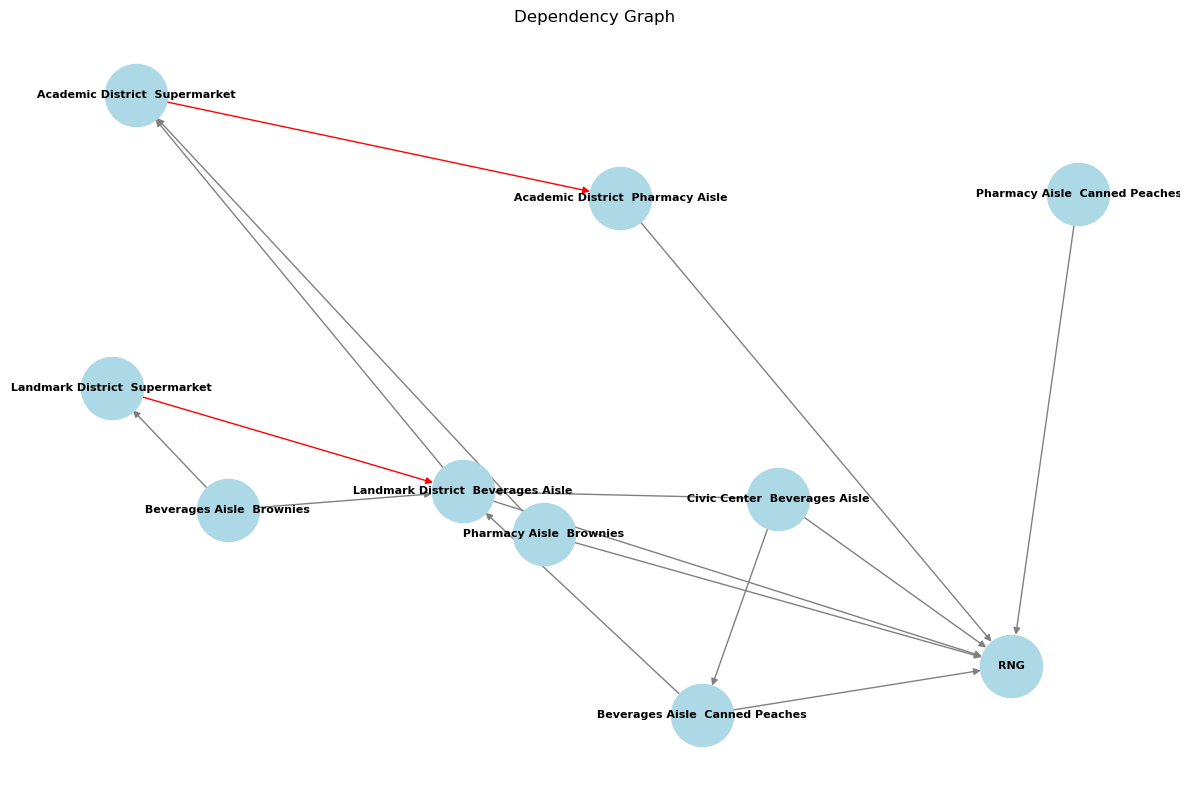

In [73]:
visualize_dependency_graph(G_d)

In [75]:
def DrawAll(op_max, ip_max, force=False):
    # Step 1-2: Determine s
    t0, t1 = np.random.randint(1, op_max + 1, size=2)
    s = min(t0, t1)
    if force:
        s = op_max

    # Step 3-4: Determine n and m
    t0, t1 = np.random.randint(1, s + 1, size=2)
    n = max(t0, t1)
    m = np.random.randint(n, s + 1)

    # Step 5: Determine d
    rel = (s - 1) / (ip_max - 1)
    weight = [-(rel - 0.2)**2, -(rel - 0.5)**2, -(rel - 0.8)**2]
    probs = np.exp(weight) / np.sum(np.exp(weight))  # softmax
    d = np.random.choice([2, 3, 4], p=probs)

    # Step 6-7: Determine w0 and w1
    t0, t1 = np.random.choice([2, 3, 4], size=2, p=probs)
    w0, w1 = min(t0, t1), max(t0, t1)

    # Step 8: Determine e
    t0, t1 = np.random.randint((d - 1) * w0, ip_max + 1, size=2)
    e = min(t0, t1, (d - 1) * w1**2)

    # Step 9: Draw Structure
    adj_list, Layers = drawStructure(e, d, w0, w1)

    # Step 10: Draw Necessary1
    Gnece2_d = drawNecessary1(Layers, adj_list, n, m)

    # Step 11: Draw Necessary2
    for _ in range(1000):
        Gnece3_d, Topo = draw_necessary2(Gnece2_d)
        if Gnece3_d is not None:
            break
    else:
        return DrawAll(op_max, ip_max, force)  # Retry from the beginning

    # Step 12: Draw Necessary3
    Gnece_d = draw_necessary3(Gnece3_d, Topo, s)
    if Gnece_d is None:
        return DrawAll(op_max, ip_max, force)  # Retry from the beginning

    # Step 13: Draw Unnecessary
    G_d = draw_unnecessary(adj_list, Layers, Gnece_d)


    return G_d, Gnece_d, Topo
 
# Example usage:
op_max = 15
ip_max = 20
G_d, Gnece_d, Topo, descriptions = DrawAll(op_max, ip_max)



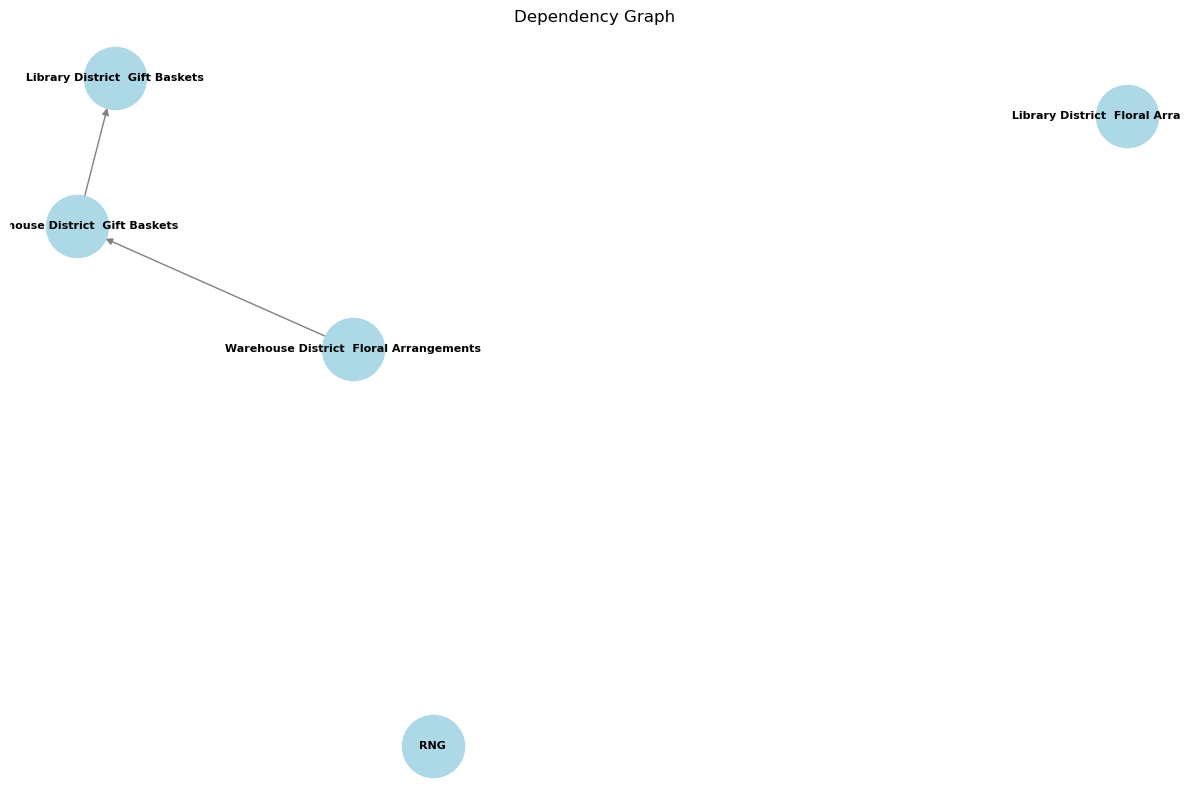

The number of  Library District  Gift Baskets  equals 11
The number of RNG equals
The number of  Warehouse District  Gift Baskets  equals  Library District  Gift Baskets 
The number of  Warehouse District  Floral Arrangements  equals  Warehouse District  Gift Baskets 
The number of  Library District  Floral Arrangements  equals 2


In [76]:
# Visualize the final dependency graph
visualize_dependency_graph(G_d)